<h1> Simple Linear Regression</h1>
<ul>
    <li>This type of regression helps to find a linear relationship between only two variables where one is dependent(Y) and the other is an independent variable(X).</li>
</ul>

<h3>Importing necessary libraries</h3>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Reading dataset</h3>

In [2]:
#read data
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
new_data = data[['sqft_living','price']]
new_data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


<h3>Determine data distribution (individuals)</h3>

<h4> For Price column </h4>

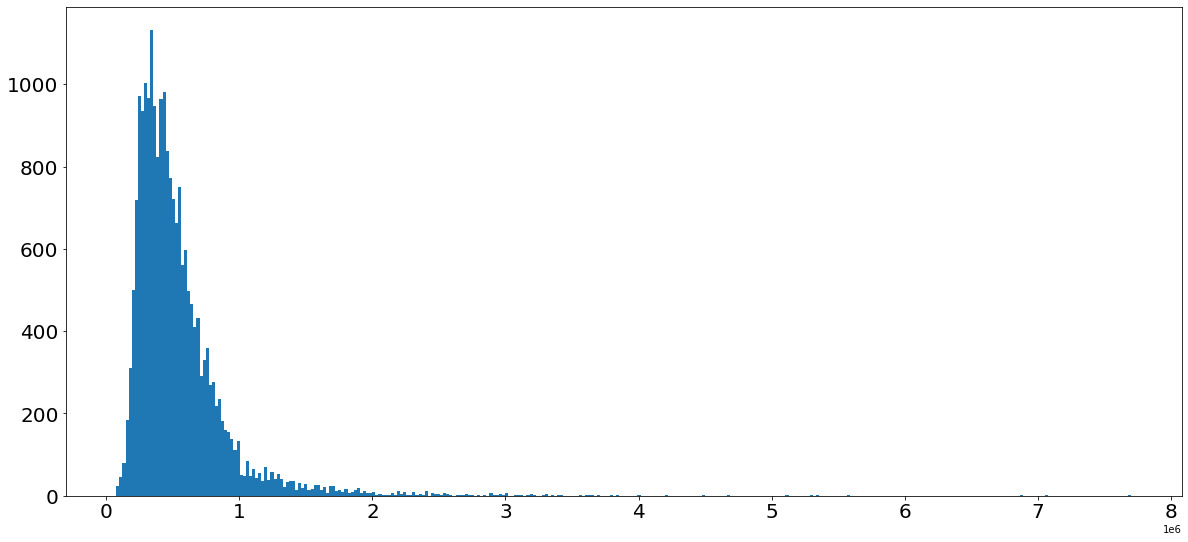

In [4]:
#checking distribution of price
no_data = len(new_data['price'])
plt.figure(figsize=(20,9))
no_bins = round(no_data ** 0.5)
given_range = max(new_data['price']-min(new_data['price']))
bin_width = given_range/no_bins
bins = []
plt.hist(new_data['price'],bins='auto')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<h4> For sqft_living(space) column </h4>

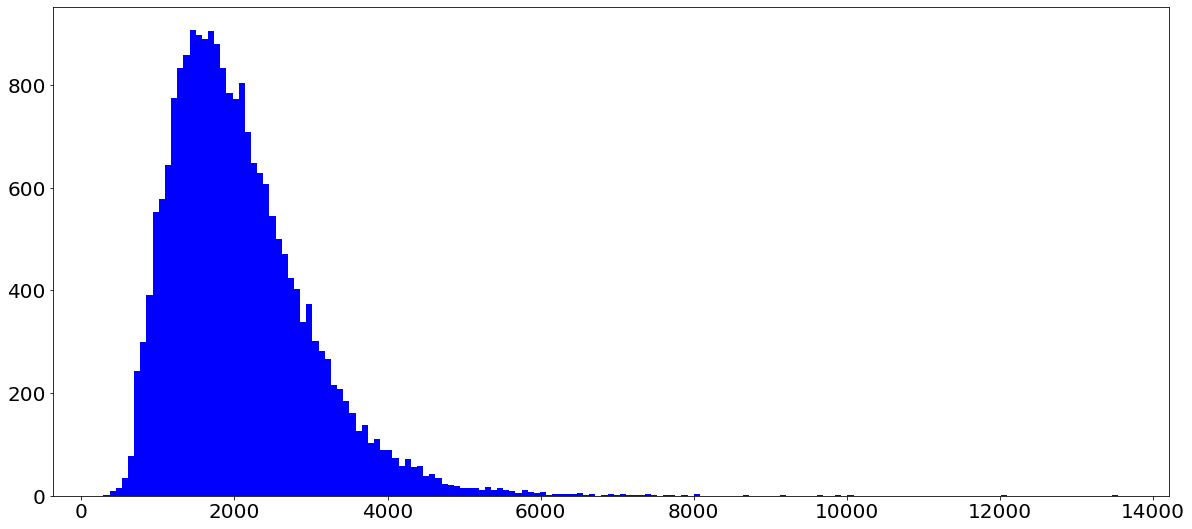

In [5]:
#checking distribution of sqrft_living
no_data = len(new_data['sqft_living'])
plt.figure(figsize=(20,9))
no_bins = round(no_data ** 0.5)
given_range = max(new_data['sqft_living']-min(new_data['sqft_living']))
bin_width = given_range/no_bins
bins = []
plt.hist(new_data['sqft_living'],bins='auto',color='b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<h3>Data infomation stuff</h3>

<h4>Check for null value </h4>

In [6]:
new_data.isna().sum()

sqft_living    0
price          0
dtype: int64

<h4>get details of dataset</h4>

In [7]:
new_data.describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  int64  
 1   price        21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


<h4> Identify shape(rows,cols) of dataset </h4>

In [9]:
# find total rows and cols
new_data.shape

(21613, 2)

<h3> find how data is distributed (contain both variables)</h3>

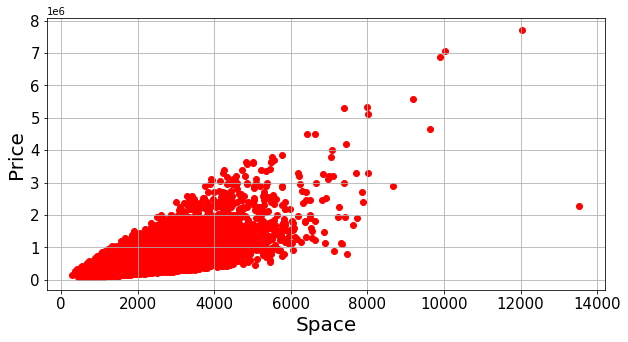

In [10]:
plt.figure(figsize =(10, 5))
plt.scatter(new_data.sqft_living,new_data.price,color="red")
plt.xlabel("Space",fontdict={'fontsize':20})
plt.ylabel("Price",fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

<h3>import ML libraries </h3>

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

<h3>split features and labels(reponse) from data</h3>

In [12]:
# split features and labels
Y = np.reshape(np.array(new_data['price']),(-1,1))
X = np.reshape(np.array(new_data['sqft_living']),(-1,1))
X_copy = X

In [13]:
print(len(X),len(Y))

21613 21613


<h3> Lets make model without splitting data</h3>

In [14]:
# initialize instance
reg = LinearRegression(fit_intercept=True,normalize=True)

In [15]:
reg.fit(X,Y)

LinearRegression(normalize=True)

In [16]:
reg.predict([[1500]])

array([[377354.6087517]])

<h4>Show regression line on scatter plot of data</h4>

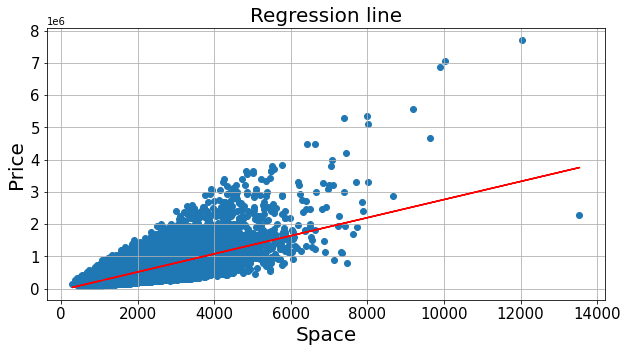

In [17]:
#now show on scatter plot
plt.figure(figsize=(10,5))
plt.title('Regression line',fontsize=20)
plt.scatter(X,Y)
plt.plot(X,reg.predict(X),color='red')
plt.xlabel("Space",fontdict={'fontsize':20})
plt.ylabel("Price",fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

In [18]:
#line equation
coeff_x = reg.coef_[0][0]
print('line quation y={:.2f}x + {:.2f}'.format(coeff_x,reg.intercept_[0]))

line quation y=280.62x + -43580.74


<h4> measure performance </h4>

In [19]:
# 1. Find reg.score
score=reg.score(X,Y)
print('Score of model is {0:.2f} %'.format(score*100))

Score of model is 49.29 %


In [20]:
# find r2score from metrices
print('r2Score of model is {0:.2f} %'.format(r2_score(Y,reg.predict(X))*100))

r2Score of model is 49.29 %


In [21]:
# mean of actual data
import statistics as st
y_mean = st.mean(Y.flatten())
y_mean

540088.1417665294

In [22]:
# predicted values
y_pre = reg.predict(X).flatten()
y_pre

array([287555.06702451, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [23]:
df =pd.DataFrame({
    'Y_actual':Y.flatten(),
    'Y_predicted' : y_pre
})
df['data-line'] = df.Y_actual - df.Y_predicted
df['data-mean'] = df.Y_actual - y_mean
df.head(3)

,Y_actual,Y_predicted,data-line,data-mean
0,221900.0,287555.067025,-65655.067025,-318188.141767
1,538000.0,677621.826402,-139621.826402,-2088.141767
2,180000.0,172499.404187,7500.595813,-360088.141767


In [24]:
# variation around the mean
temp = 0
for x in df['data-mean']:
    temp = temp + pow(x,2)

var_around_mean = temp/len(df)

In [25]:
# variation around the fit
temp = 0
for x in df['data-line']:
    temp = temp + pow(x,2)

var_around_fit = temp/len(df)

In [26]:
var_around_fit,var_around_mean

(68351286833.04002, 134776142225.57248)

In [27]:
# find r-Square
r_square = (var_around_mean-var_around_fit)/var_around_mean

In [28]:
def mean_absolute_percentage_error(a,b):
    sum1=0
    for x,y in zip(a,b):
        sum1 = sum1 + abs((x-y)/x)
    return sum1/len(a)

In [29]:
print('R_square value is      {0:.2f} %'.format(r_square*100))
print('MSE value      is      {0:.2f} '.format(mean_squared_error(Y.flatten(),y_pre)))
print('MAE value      is      {0:.2f} '.format(mean_absolute_error(Y.flatten(),y_pre)))
print('MAPE value     is      {0:.2f} %'.format(mean_absolute_percentage_error(Y.flatten(),y_pre)*100))

R_square value is      49.29 %
MSE value      is      68351286833.04 
MAE value      is      173688.27 
MAPE value     is      35.99 %


In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [31]:
sm_model = sm.OLS(Y,X).fit()

In [32]:
# print coefficient
# print("coefficient of regression line = {}".format(sm_model.params[0][1]))
sm_model.params

array([-43580.74309447,    280.6235679 ])

<h4>Performance Summaries</h4>

In [33]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        19:15:00   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
x1           280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.493      
Dependent Variable: y                AIC:                600538.5666
Date:               2021-05-16 19:15 BIC:                600554.5287
No. Observations:   21613            Log-Likelihood:     -3.0027e+05
Df Model:           1                F-statistic:        2.100e+04  
Df Residuals:       21611            Prob (F-statistic): 0.00       
R-squared:          0.493            Scale:              6.8358e+10 
--------------------------------------------------------------------
          Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------
const  -43580.7431 4402.6897  -9.8987 0.0000 -52210.3396 -34951.1466
x1        280.6236    1.9364 144.9204 0.0000    276.8281    284.4191
--------------------------------------------------------------------
Omnibus:            14832.490      Durbin-Watson:         1.983     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      546444.713
Skew:               2.824          Prob(JB):              0.000     
Kurtosis:           26.977         Condition No.:         5629      
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

<h4>Residual Graph</h4>

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

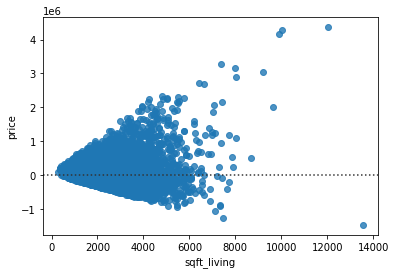

In [35]:
sns.residplot(x ="sqft_living",
              y = "price",
              data = new_data)

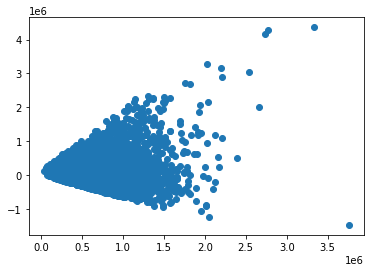

In [36]:
residual = []
for x,y in zip(Y.flatten(),y_pre):
    residual.append(x-y)

plt.scatter(y_pre,residual)
plt.show()

<h3> Lets make model with splitting data</h3>

<h4>Split data into train and test data</h4>

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_copy,Y,random_state=0,test_size=0.2)

In [38]:
pd.DataFrame({
    'x_train':[len(x_train)],
    'x_test' :[len(x_test)],
    'y_train':[len(y_train)],
    'y_test' :[len(y_test)]
}).style.hide_index()


x_train,x_test,y_train,y_test
17290,4323,17290,4323


<h4>Model initialization and fitting</h4>

In [39]:
regression_instance = LinearRegression(fit_intercept=True,normalize=True)

In [40]:
regression_instance.fit(x_train,y_train)

LinearRegression(normalize=True)

In [41]:
regression_instance.predict(x_test)

array([[ 357817.97314081],
       [1277876.09832343],
       [ 360657.65871236],
       ...,
       [ 337940.17413995],
       [ 221513.06570634],
       [ 417451.37014338]])

<h4>Compare distribution lines for test and train data</h4>

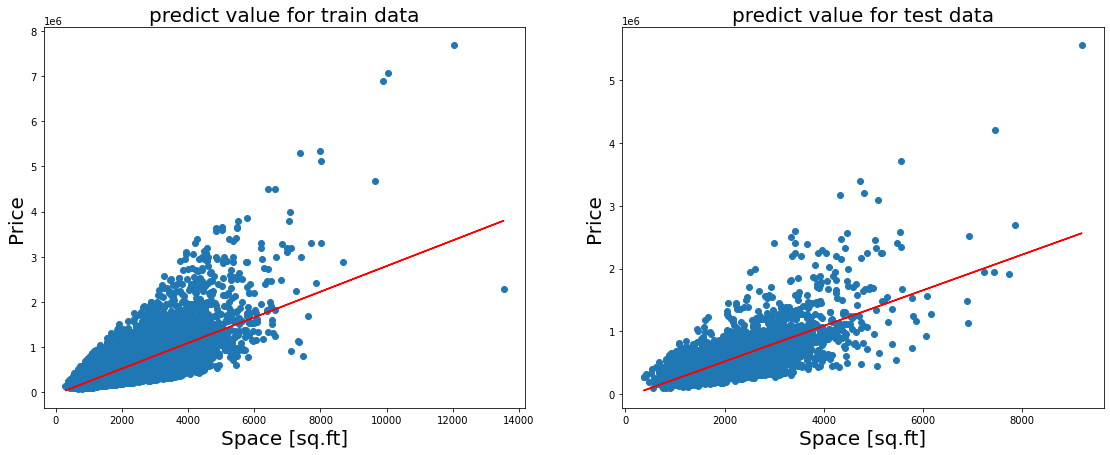

In [42]:
fig,ax = plt.subplots(1,2,figsize=(19, 7))

ax[0].scatter(x_train,y_train)
ax[0].plot(x_train,regression_instance.predict(x_train),color="red")
ax[0].set_ylabel('Price',fontsize=20)
ax[0].set_xlabel('Space [sq.ft]',fontsize=20)
ax[0].set_title('predict value for train data',fontsize=20)

ax[1].scatter(x_test,y_test)
ax[1].plot(x_test,regression_instance.predict(x_test),color="red")
ax[1].set_ylabel('Price',fontsize=20)
ax[1].set_xlabel('Space [sq.ft]',fontsize=20)
ax[1].set_title('predict value for test data',fontsize=20)
plt.show()

<h4>Line Equation</h4>

In [61]:
print('y = {:.2f}x + {:.2f}'.format(regression_instance.coef_[0][0],regression_instance.intercept_[0]))

y = 283.97x + -48257.06


<h4>Measures Perfomance</h4>

In [43]:
#1 find score of model
score = regression_instance.score(x_test,y_test)
print('Score of model is {0:.2f} %'.format(score*100))

Score of model is 47.92 %


In [44]:
#2 find r2-score
r2_score = r2_score(y_test,regression_instance.predict(x_test))
print('r2Score of model is {0:.2f} %'.format(r2_score*100))

r2Score of model is 47.92 %


In [45]:
# mean of actual data
import statistics as st
y_mean_test = st.mean(y_test.flatten())
y_mean_test

529242.6123062688

In [46]:
# predicted values
y_pre_test = regression_instance.predict(x_test).flatten()
y_pre_test

array([ 357817.97314081, 1277876.09832343,  360657.65871236, ...,
        337940.17413995,  221513.06570634,  417451.37014338])

In [47]:
df_test = pd.DataFrame({
    'Actual_data':y_test.flatten(),
    'Predicted_data':y_pre_test,
})
df_test['data-mean'] = df_test.Actual_data - y_mean_test
df_test['data-line'] = df_test.Actual_data - y_pre_test
df_test.head(2)

,Actual_data,Predicted_data,data-mean,data-line
0,297000.0,3.578180e+05,-2.322426e+05,-60817.973141
1,1578000.0,1.277876e+06,1.048757e+06,300123.901677


In [48]:
# variance around the mean
temp = 0
for x in df_test['data-mean']:
    temp = temp + pow(x,2)
var_around_mean_test = temp/len(df_test)

In [49]:
# variation around the fit
temp = 0
for x in df_test['data-line']:
    temp = temp + pow(x,2)

var_around_fit_test = temp/len(df_test)

In [50]:
var_around_fit_test,var_around_mean_test

(61940787124.62489, 118924269296.64992)

In [51]:
# find r-Square
r_square_test = (var_around_mean_test-var_around_fit_test)/var_around_mean_test

In [52]:
print('R_square value is      {0:.2f} %'.format(r_square_test*100))
print('MSE value      is      {0:.2f} '.format(mean_squared_error(y_test.flatten(),y_pre_test)))
print('MAE value      is      {0:.2f} '.format(mean_absolute_error(y_test.flatten(),y_pre_test)))
print('MAPE value     is      {0:.2f} %'.format(mean_absolute_percentage_error(y_test.flatten(),y_pre_test)*100))

R_square value is      47.92 %
MSE value      is      61940787124.62 
MAE value      is      170780.93 
MAPE value     is      36.54 %


In [53]:
r_square

0.4928532179037914

<h4>Medel summaries</h4>

In [63]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
model = sm.OLS(y_train,X2).fit()

In [64]:
model.params

array([-48257.06359103,    283.96855716])

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        19:22:24   Log-Likelihood:            -2.4041e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17288   BIC:                         4.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.826e+04   4961.872     -9.726      0.000    -5.8e+04   -3.85e+04
x1           283.9686      2.179    130.312      0.000     279.697     288.240
==============================================================================
Omnibus:                    12071.546   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471754.959
Skew:                           2.876   Prob(JB):                         0.00
Kurtosis:                      27.935   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.495      
Dependent Variable: y                AIC:                480825.8245
Date:               2021-05-16 19:22 BIC:                480841.3403
No. Observations:   17290            Log-Likelihood:     -2.4041e+05
Df Model:           1                F-statistic:        1.698e+04  
Df Residuals:       17288            Prob (F-statistic): 0.00       
R-squared:          0.496            Scale:              6.9980e+10 
--------------------------------------------------------------------
          Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------
const  -48257.0636 4961.8719  -9.7256 0.0000 -57982.8347 -38531.2925
x1        283.9686    2.1791 130.3117 0.0000    279.6972    288.2399
--------------------------------------------------------------------
Omnibus:            12071.546      Durbin-Watson:         2.017     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      471754.959
Skew:               2.876          Prob(JB):              0.000     
Kurtosis:           27.935         Condition No.:         5616      
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""